# Задача 1. Минимизация гладкой функции

Рассмотрим все ту же функцию из задания по линейной алгебре: $f(x) = sin(\frac{x}{5}) \cdot exp(\frac{x}{10}) + 5 \cdot exp(\frac{-x}{2})$, 
но теперь уже на промежутке [1, 30].
В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize.

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
def original_func(x):
    '''Returns observed function'''
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [3]:
# Настроим графики
rcParams.update({'figure.figsize': (10, 8),
                 'font.size': 20,
                 'figure.titleweight': 'bold',
                 'lines.markersize': 15,
                 'lines.markeredgewidth': 3})
ax = np.linspace(1, 30, 1000)

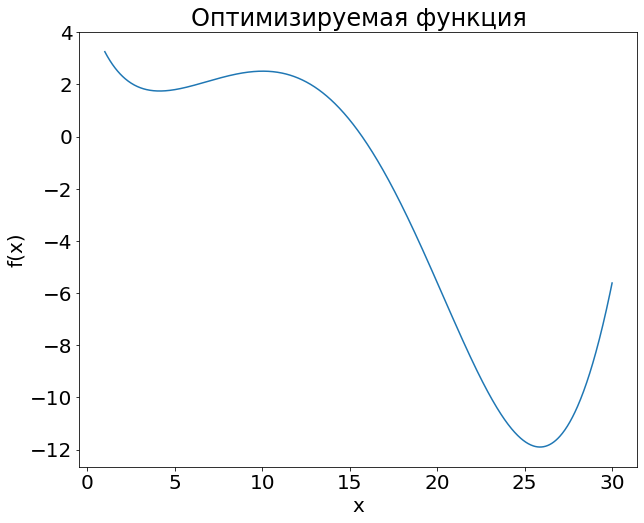

In [4]:
# Посмотрим на оптимизируемую функцию
plt.plot(ax, original_func(ax));
plt.title('Оптимизируемая функция');
plt.xlabel('x');
plt.ylabel('f(x)');

In [5]:
def draw_optimized(func, ans, x_0):
    '''Draws function with start and end optimization points'''
    plt.plot(ax, func(ax));
    plt.plot(x_0, func(x_0), 'bx', label='Start');
    plt.plot(ans.x, func(ans.x), 'rx', label='Optimized');
    plt.title('Оптимизация функции');
    plt.xlabel('x');
    plt.ylabel('f(x)');
    plt.legend();

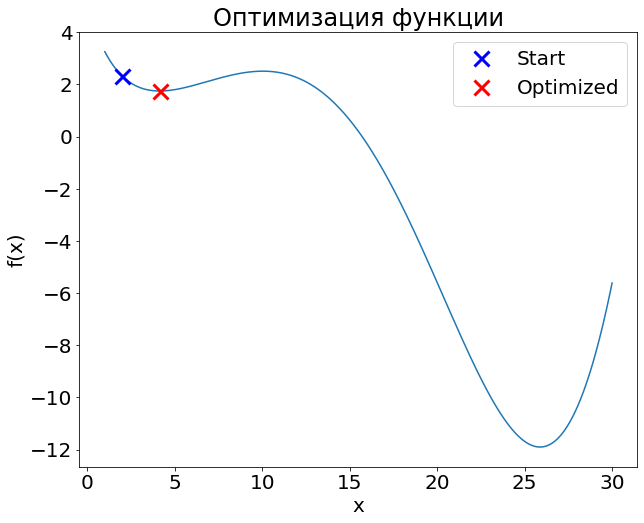

In [6]:
# Стартовая точка х = 2
x_0 = 2
opt_1 = minimize(original_func, x_0, method='BFGS')
draw_optimized(original_func, opt_1, x_0)

In [7]:
ans_1 = round(original_func(opt_1.x.item()), 2)
print(f'Найденное значение функции f(x) = {ans_1}')

Найденное значение функции f(x) = 1.75


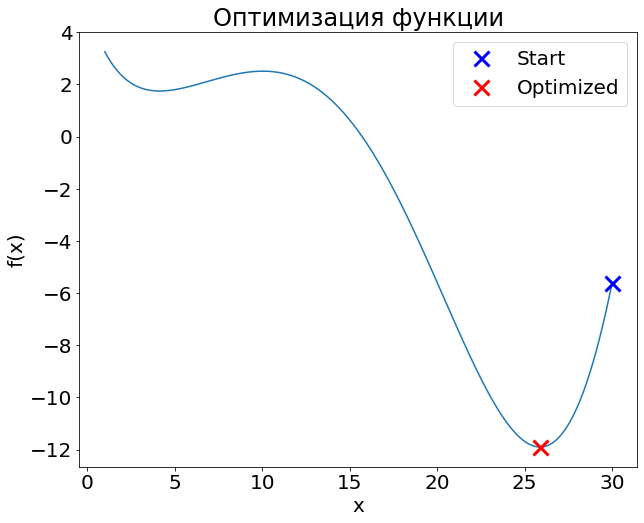

In [8]:
# Стартовая точка х = 30
x_0 = 30
opt_2 = minimize(original_func, x_0, method='BFGS')
draw_optimized(original_func, opt_2, x_0)

In [9]:
ans_2 = round(original_func(opt_2.x.item()), 2)
print(f'Найденное значение функции f(x) = {ans_2}')

Найденное значение функции f(x) = -11.9


In [10]:
# Запись ответа в файл
with open('submission-1.txt', 'w') as out:
    out.write(f'{ans_1} {ans_2}')

# Задача 2. Глобальная оптимизация
Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.

In [11]:
from scipy.optimize import differential_evolution

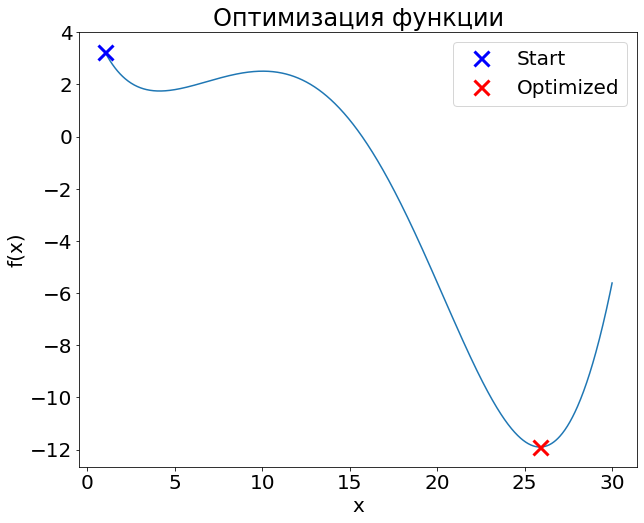

In [12]:
# Дифференциальная эволюция
opt_3 = differential_evolution(original_func, bounds=[(1, 30)])
draw_optimized(original_func, opt_3, 1) # У этого метода нет стартовой точки, но в функции требуется, так что я поставил 1

In [13]:
ans_3 = round(original_func(opt_3.x.item()), 2)
print(f'Найденное значение функции f(x) = {ans_3}')

Найденное значение функции f(x) = -11.9


In [14]:
# Сравнение BFGS при хорошем приблоижении с дифференциальной эволюцией
print(f'BFGS: количество итераций = {opt_2.nit}')
print(f'BFGS: количество вычислений значения функции = {opt_2.nfev}\n')
print(f'Дифференциальная эволюция: количество итераций = {opt_3.nit}')
print(f'Дифференциальная эволюция: количество вычислений значения функции = {opt_3.nfev}')

BFGS: количество итераций = 6
BFGS: количество вычислений значения функции = 14

Дифференциальная эволюция: количество итераций = 4
Дифференциальная эволюция: количество вычислений значения функции = 81


In [15]:
# Запись ответа в файл
with open('submission-2.txt', 'w') as out:
    out.write(f'{ans_3}')

# Задача 3. Минимизация негладкой функции

Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. 

In [16]:
def non_smooth(x):
    '''Returns non_smooth version of original observed function'''
    return original_func(x).astype(int)

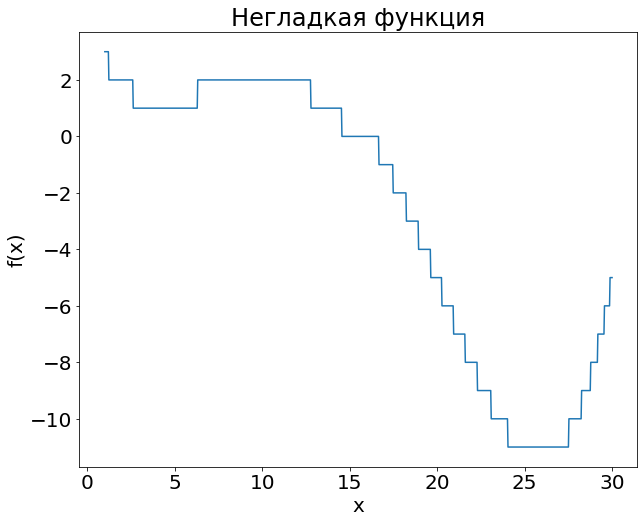

In [17]:
# Нарисуем получившуюся негладкую функцию
plt.plot(ax, non_smooth(ax));
plt.title('Негладкая функция');
plt.xlabel('x');
plt.ylabel('f(x)');

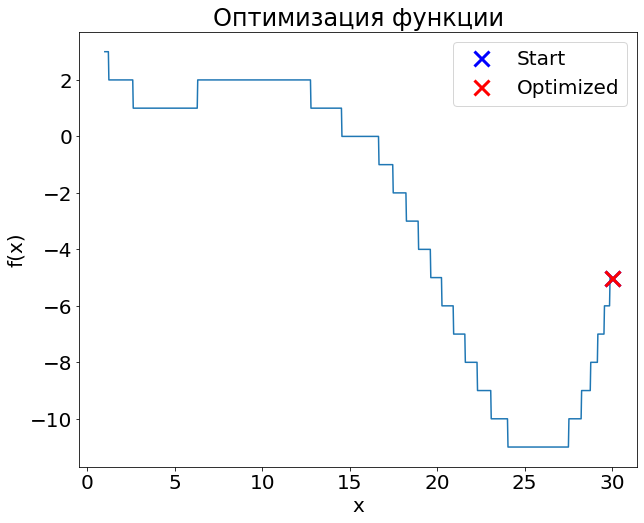

In [18]:
# Оптимизация методом BFGS, стартовая точка х = 30
opt_1 = minimize(non_smooth, 30, method='BFGS')
draw_optimized(non_smooth, opt_1, 30)

In [19]:
ans_1 = round(non_smooth(opt_1.x.item()), 2)
print(f'Найденное значение функции f(x) = {ans_1}')

Найденное значение функции f(x) = -5


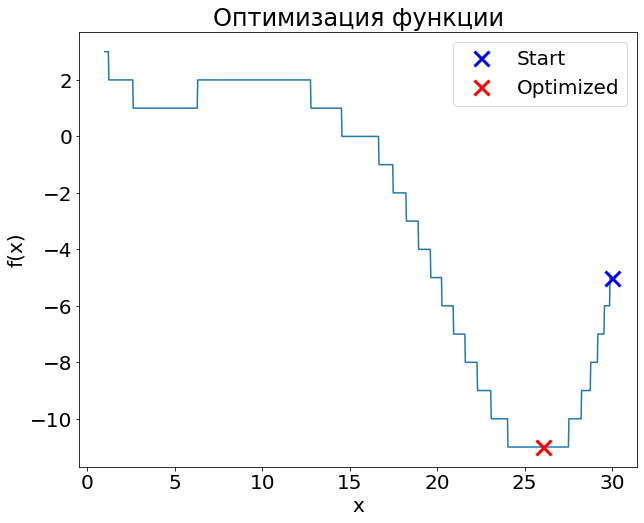

In [20]:
# Оптимизация методом дифференциальной эволюции
opt_2 = differential_evolution(non_smooth, bounds=[(1, 30)])
draw_optimized(non_smooth, opt_2, 30)

In [21]:
ans_2 = round(non_smooth(opt_2.x.item()), 2)
print(f'Найденное значение функции f(x) = {ans_2}')

Найденное значение функции f(x) = -11


Градиентные методы не подходят для оптимизации негладких функций

In [22]:
# Запись ответа в файл
with open('submission-3.txt', 'w') as out:
    out.write(f'{ans_1} {ans_2}')